In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# for data analysis and data visualisation
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# for data preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
# for model building and testing
from sklearn import linear_model
# for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from mlxtend.evaluate import proportion_difference, mcnemar_table, mcnemar, paired_ttest_kfold_cv

In [2]:
titanic = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.duplicated().sum()

0

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [19]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
titanic.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
num_of_survived = titanic['Survived'].value_counts().reset_index()
num_of_survived

,Survived,count
0,0,549
1,1,342


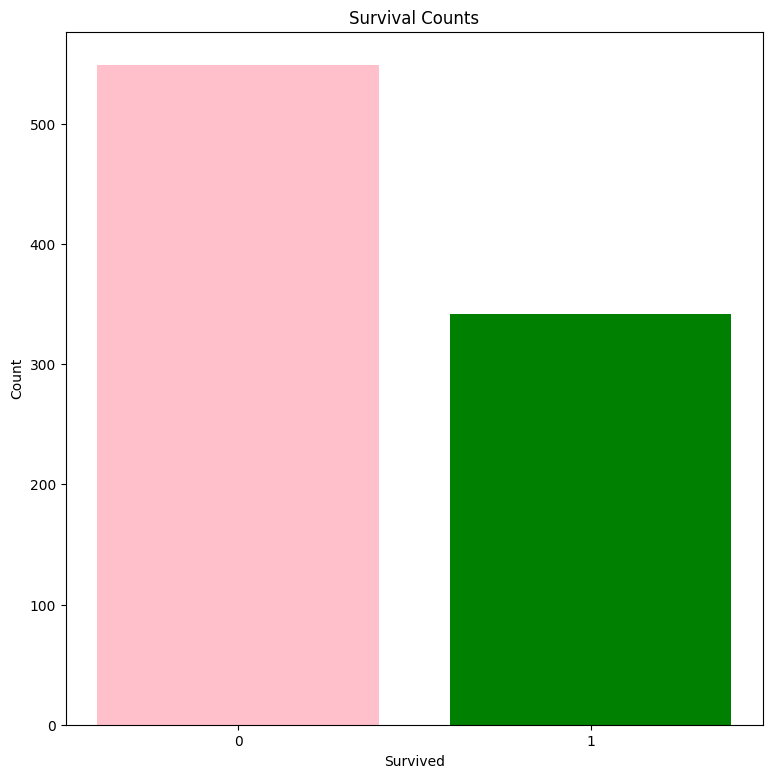

In [23]:
plt.figure(figsize=(9,9))
plt.bar(x=num_of_survived['Survived'], height=num_of_survived['count'], color=['pink', 'green'])
plt.xticks(num_of_survived['Survived'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

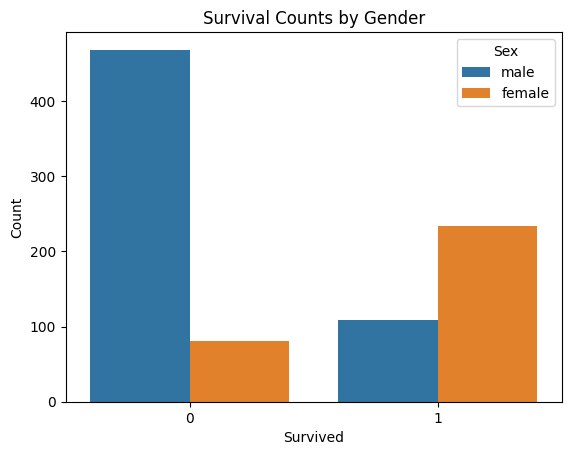

In [24]:
sns.countplot(x='Survived', hue = 'Sex', data = titanic)
plt.title('Survival Counts by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [25]:
pclass = titanic['Pclass'].value_counts().reset_index()
pclass

,Pclass,count
0,3,491
1,1,216
2,2,184


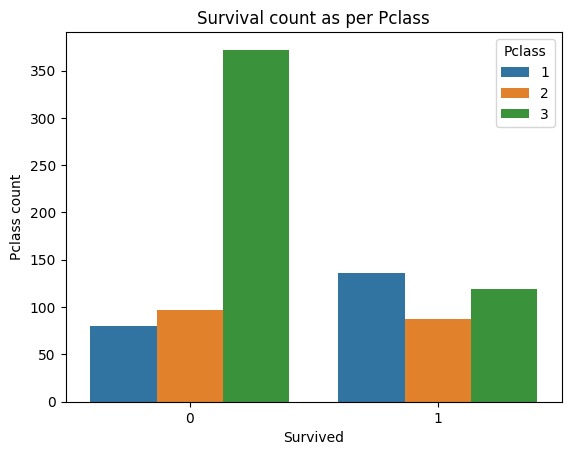

In [26]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survival count as per Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass count')
plt.show()

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
titanic['Parch'].value_counts().reset_index()

,Parch,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


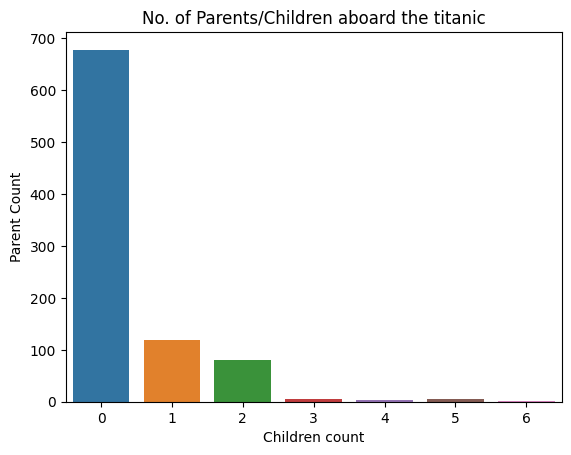

In [29]:
sns.countplot(x='Parch', data=titanic)
plt.title('No. of Parents/Children aboard the titanic')
plt.xlabel('Children count')
plt.ylabel('Parent Count')
plt.show()

In [30]:
titanic['SibSp'].value_counts().reset_index()

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


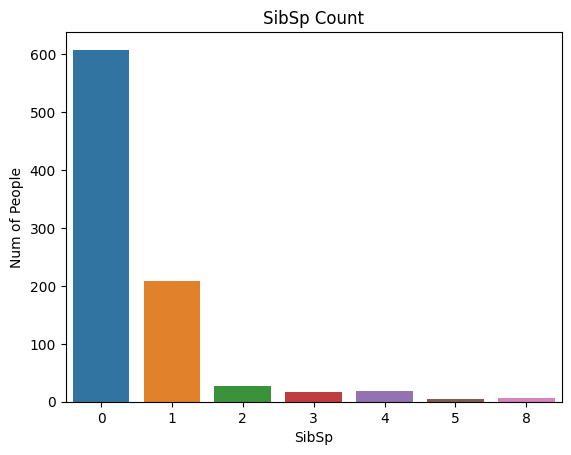

In [31]:
sns.countplot(x='SibSp', data=titanic)
plt.title('SibSp Count')
plt.xlabel('SibSp')
plt.ylabel('Num of People')
plt.show()

In [32]:
titanic['Embarked'].value_counts().reset_index()

,Embarked,count
0,S,644
1,C,168
2,Q,77


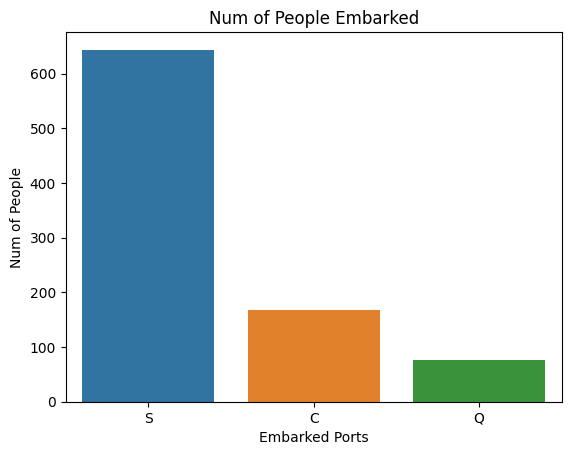

In [33]:
sns.countplot(x='Embarked', data=titanic)
plt.title('Num of People Embarked')
plt.xlabel('Embarked Ports')
plt.ylabel('Num of People')
plt.show()

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [37]:
titanic.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace = True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [38]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [40]:
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Sex'])

In [41]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,29.699118,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [43]:
Y=titanic['Survived']
X=titanic.drop(columns='Survived', axis=1)

In [44]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [46]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state = 43)

In [47]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
598,3,1,29.699118,0,0,7.2250,1
841,2,1,16.000000,0,0,10.5000,1
532,3,1,17.000000,1,1,7.2292,1
500,3,1,17.000000,0,0,8.6625,1
438,1,1,64.000000,1,4,263.0000,1
...,...,...,...,...,...,...,...
277,2,1,29.699118,0,0,0.0000,1
817,2,1,31.000000,1,1,37.0042,1
255,3,0,29.000000,0,2,15.2458,0
320,3,1,22.000000,0,0,7.2500,1


In [48]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
770,3,1,24.000000,0,0,9.5000,1
853,1,0,16.000000,0,1,39.4000,0
144,2,1,18.000000,0,0,11.5000,1
141,3,0,22.000000,0,0,7.7500,0
261,3,1,3.000000,4,2,31.3875,1
...,...,...,...,...,...,...,...
9,2,0,14.000000,1,0,30.0708,0
394,3,0,24.000000,0,2,16.7000,0
528,3,1,39.000000,0,0,7.9250,1
268,1,0,58.000000,0,1,153.4625,0


In [49]:
Y_train

598    0
841    0
532    0
500    0
438    0
      ..
277    0
817    0
255    1
320    0
836    0
Name: Survived, Length: 668, dtype: int64

In [50]:
y_test

770    0
853    1
144    0
141    1
261    1
      ..
9      1
394    1
528    0
268    1
564    0
Name: Survived, Length: 223, dtype: int64

In [51]:
correlation = titanic.drop(columns=['Embarked', 'Sex'])
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [52]:
correlation.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

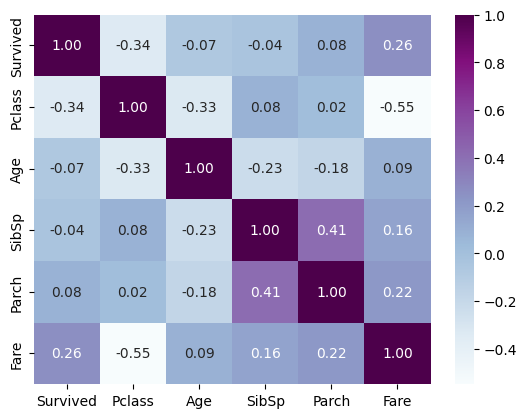

In [53]:
sns.heatmap(correlation.corr(), annot=True, cmap = 'BuPu', fmt=".2f")

In [54]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(X_train,Y_train)

BayesianRidge()

In [55]:
y_pred_bay = bayesian_ridge.predict(x_test)
y_pred_bay = np.where(y_pred_bay>0.5, 1, 0)
y_pred_bay

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1])

In [56]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0])

In [57]:
bayesian_ridge.score(x_test, y_test)

0.23127798237147001

In [58]:
bayesian_ridge.score(X_train, Y_train)

0.4481821060642295

In [59]:
clf_SGD = linear_model.SGDClassifier(loss='log_loss', penalty = 'l2', max_iter = 100)
clf_SGD.fit(X_train, Y_train)

SGDClassifier(loss='log_loss', max_iter=100)

In [60]:
y_pred = clf_SGD.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0])

In [61]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0])

In [62]:
clf_SGD.score(x_test, y_test)

0.7085201793721974

In [63]:
clf_SGD.score(X_train, Y_train)

0.7335329341317365

In [64]:
confusion_matrix(y_test, y_pred_bay)

array([[115,  20],
       [ 37,  51]])

In [65]:
print(classification_report(y_test, y_pred_bay))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       135
           1       0.72      0.58      0.64        88

    accuracy                           0.74       223
   macro avg       0.74      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



In [66]:
confusion_matrix(y_test, y_pred)

array([[110,  25],
       [ 40,  48]])

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       135
           1       0.66      0.55      0.60        88

    accuracy                           0.71       223
   macro avg       0.70      0.68      0.68       223
weighted avg       0.70      0.71      0.70       223



In [68]:
# Calculate accuracy

acc1 = accuracy_score(y_test, y_pred_bay)
acc2 = accuracy_score(y_test, y_pred)

In [69]:
# Running Z-test to compare SGD classifier and Bayesian Ridge

print("proportions Z-test")
z, p = proportion_difference(acc1, acc2, n_1=len(y_test))
print(f"z statistic: {z}, p-value: {p}\n")

proportions Z-test
z statistic: 0.8504658219658502, p-value: 0.8024669227061563



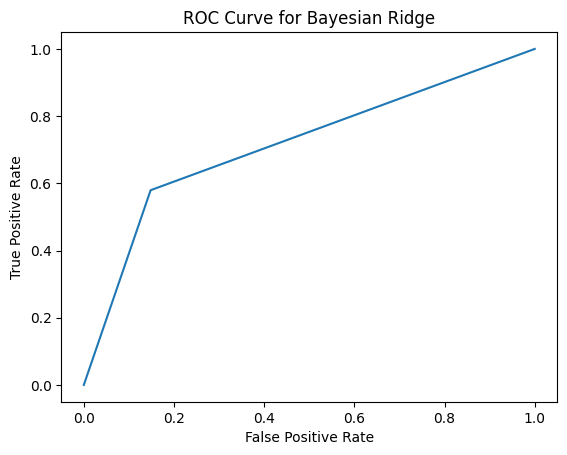

In [70]:
fpr_bay, tpr_bay, thresh_bay = roc_curve(y_test, y_pred_bay)
auc_bay = roc_auc_score(y_test, y_pred_bay)
plt.plot(fpr_bay, tpr_bay, label="Bayesian Ridge" +str(auc_bay));
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bayesian Ridge')
plt.show()

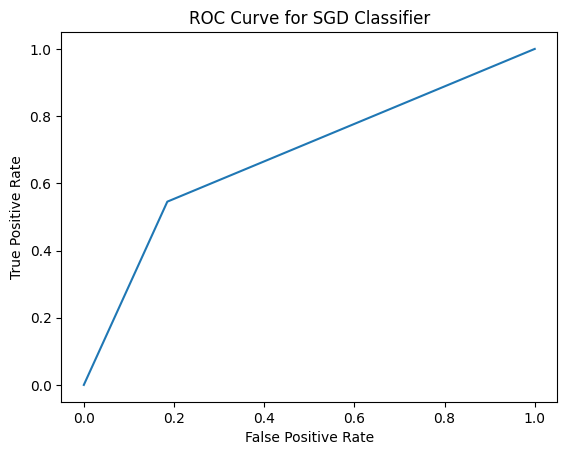

In [71]:
fpr_sgd, tpr_sgd, thresh_sgd = roc_curve(y_test, y_pred)
auc_sgd = roc_auc_score(y_test, y_pred)
plt.plot(fpr_sgd, tpr_sgd, label="SGD Classifier, AUC=" + str(auc_sgd));
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SGD Classifier')
plt.show()